KMeans: Choosing clusters

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('df_audio_features_1000')
df.head(5)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,All Shook Up,Elvis Presley,0.624,0.468,10,-12.162,1,0.1320,0.881,0.000006,0.144,0.952,74.139,NaN,117080,4,5ueyLj6e6oVaTY0KQ6yLaA,https://open.spotify.com/track/5ueyLj6e6oVaTY0...
1,I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.107,0.591,127.150,NaN,223760,4,3aEJMh1cXKEjgh52claxQp,https://open.spotify.com/track/3aEJMh1cXKEjgh5...
2,Smoke Gets In Your Eyes,The Platters,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.617,0.224,114.278,NaN,157293,4,307XEC1IUwUs9ojlEFwH7f,https://open.spotify.com/track/307XEC1IUwUs9oj...
3,"What'd I Say, Pt. 1 & 2",Ray Charles,0.540,0.681,4,-5.440,1,0.0508,0.808,0.000000,0.162,0.794,88.385,NaN,307053,4,5yQ9iMZXGcr5rlO4hoLsP4,https://open.spotify.com/track/5yQ9iMZXGcr5rlO...
4,Dream A Little Dream Of Me,Ella Fitzgerald,0.455,0.167,0,-13.613,1,0.0739,0.918,0.000000,0.173,0.404,76.118,NaN,185067,4,3vFVS2WYHDG4KkWCNecvpn,https://open.spotify.com/track/3vFVS2WYHDG4KkW...


In [32]:
df.drop(['id','html','type'], axis=1, inplace=True) # drop some columns we are not going to use
df.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,All Shook Up,Elvis Presley,0.624,0.468,10,-12.162,1,0.1320,0.881,0.000006,0.144,0.952,74.139,117080,4
1,I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.107,0.591,127.150,223760,4
2,Smoke Gets In Your Eyes,The Platters,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.617,0.224,114.278,157293,4
3,"What'd I Say, Pt. 1 & 2",Ray Charles,0.540,0.681,4,-5.440,1,0.0508,0.808,0.000000,0.162,0.794,88.385,307053,4
4,Dream A Little Dream Of Me,Ella Fitzgerald,0.455,0.167,0,-13.613,1,0.0739,0.918,0.000000,0.173,0.404,76.118,185067,4


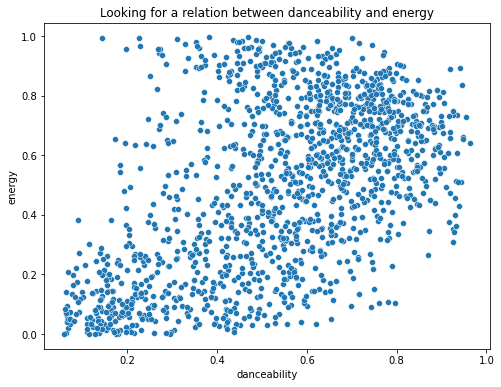

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x='danceability', y='energy')
plt.title('Looking for a relation between danceability and energy')
plt.show()

In [34]:
scale=df[['danceability','energy']]  # let's only use the measurements related to the bill
scale.head()

,danceability,energy
0,0.624,0.468
1,0.585,0.247
2,0.290,0.227
3,0.540,0.681
4,0.455,0.167


In [35]:
scale.describe()

,danceability,energy
count,1440.000000,1440.000000
mean,0.538917,0.494241
std,0.219193,0.281917
min,0.059600,0.000020
25%,0.386000,0.243000
50%,0.562000,0.529500
75%,0.710250,0.733000
max,0.964000,0.996000


In [36]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler() -> Transform features by scaling each feature to a given range; default is between 0 and 1. 
# .fit_transform() -> fit finds the minimum and the maximum and transform will change your data in regard to the fit values.
df_norm = MinMaxScaler().fit_transform(scale)

In [37]:
type(df_norm)

numpy.ndarray

In [38]:
# let's see the first 5 observations after normalising the data
df_norm = pd.DataFrame(df_norm) #turn it back into a dataframe
df_norm.columns = ['danceability','energy']
df_norm[:5]

,danceability,energy
0,0.624060,0.469869
1,0.580938,0.247977
2,0.254755,0.227896
3,0.531181,0.683728
4,0.437196,0.167654


In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=13)
kmeans.fit(df_norm)  # Compute k-means clustering

KMeans(n_clusters=13)

In [40]:
kmeans.cluster_centers_

array([[0.1093256 , 0.08757266],
       [0.49931647, 0.6846983 ],
       [0.67504719, 0.61815501],
       [0.57819594, 0.18688921],
       [0.8134962 , 0.77338174],
       [0.3930621 , 0.92035052],
       [0.71973202, 0.37757459],
       [0.6298201 , 0.85197077],
       [0.26522016, 0.59504638],
       [0.87068462, 0.55339319],
       [0.36395282, 0.11320437],
       [0.23579884, 0.29553254],
       [0.50480074, 0.42660523]])

In [41]:
cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ['danceability','energy']
cl_pos

,danceability,energy
0,0.109326,0.087573
1,0.499316,0.684698
2,0.675047,0.618155
3,0.578196,0.186889
4,0.813496,0.773382
5,0.393062,0.920351
6,0.719732,0.377575
7,0.629820,0.851971
8,0.265220,0.595046
9,0.870685,0.553393


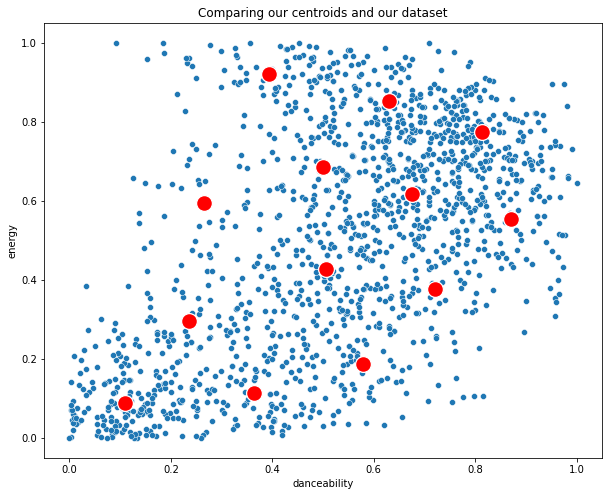

In [42]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_data = pd.DataFrame(df_norm)
plot_data.columns = ['danceability','energy']

plt.title('Comparing our centroids and our dataset')
plt.xlabel('danceability')
plt.ylabel('energy')
sns.scatterplot(data=plot_data, x='danceability', y='energy')
sns.scatterplot(data=cl_pos, x='danceability', y='energy', color='red', s=250)
plt.show()

In [43]:
df['cluster'] = kmeans.labels_
df.sample(5)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
1339,Confidence - Live,Tasha Cobbs Leonard,0.416,0.765,5,-4.497,1,0.0691,0.05550,0.000000,0.6000,0.349,129.806,374707,3,1
460,REMIND ME,Rilès,0.843,0.715,1,-5.553,0,0.2180,0.03610,0.000000,0.0754,0.540,90.966,151013,4,4
404,"How Far I'll Go - From ""Vaiana""",Alessia Cara,0.309,0.544,9,-9.621,1,0.3520,0.15500,0.000265,0.0727,0.160,180.979,175517,4,8
1332,You Brought The Sunshine - Live,The Clark Sisters,0.507,0.910,10,-3.058,0,0.2500,0.12000,0.000000,0.0760,0.503,124.592,258373,4,5
472,Stronger,Kanye West,0.369,0.785,1,-6.269,1,0.2000,0.00299,0.000000,0.2060,0.443,104.033,312893,4,5


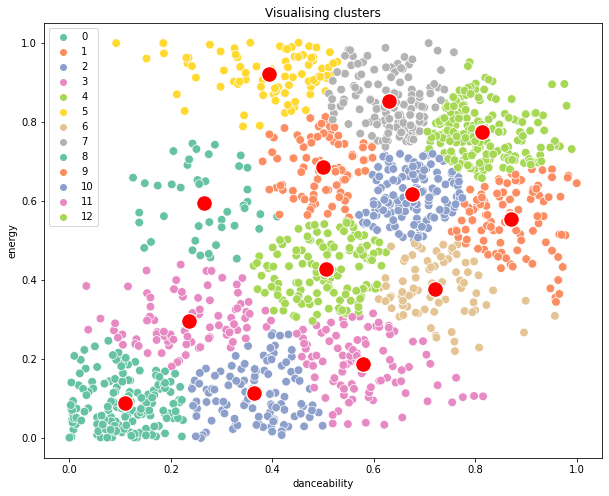

In [44]:
# create plot dataframe
plot_data = pd.DataFrame(df_norm)
plot_data.columns = ['danceability','energy']
plot_data['cluster'] = kmeans.labels_

# size and plot titles
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Visualising clusters')
plt.xlabel('danceability')
plt.ylabel('energy')

# scatter plot
sns.scatterplot(data=plot_data, x='danceability', y='energy', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='danceability', y='energy', color='red', s=250)
plt.show()

Ways to find the right number of clusters:
1.Inertia method
2.Silhouette score

Using inertia

In [45]:
kmeans.inertia_

12.811173708391218

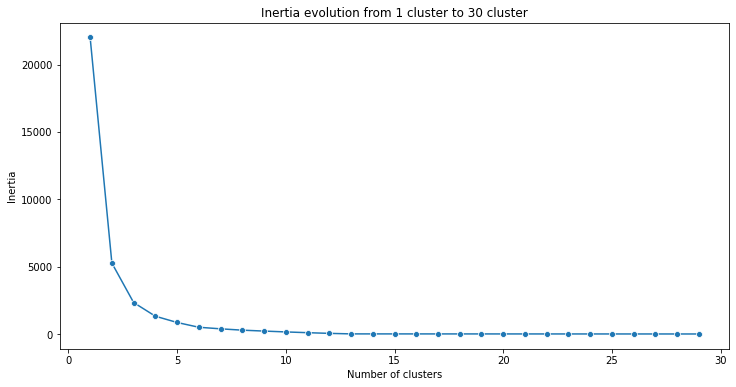

In [46]:
max_k = 30
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(df_norm).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Silhouette Score

In [47]:
from sklearn.metrics import silhouette_score
silhouette_score(df_norm, kmeans.labels_)


0.891082423088539

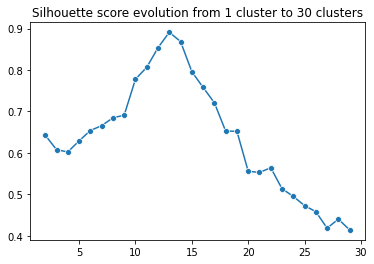

In [48]:
max_k = 30
sil_score = []


for k in range(2, max_k): 
    labels = KMeans(n_clusters=k).fit(df_norm).labels_
    sil_score.append(silhouette_score(df_norm,labels))

plt.title(f'Silhouette score evolution from 1 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score, marker='o')
plt.show()

The silhouette coefficient can vary between -1 and +1: 

|   |   |
|---|---|
|+1   | the instance is well inside its own cluster and far from other clusters.  |
|0   | the instance is close to a cluster boundary.   |
|-1   | the instance may have been assigned to the wrong cluster.  |

#Solution:There are 13 clusters (there is a sudden fall from 13 ) and so, there are 13 playlists